<a href="https://colab.research.google.com/github/zahrababacar6c/Detection-du-Cancer-du-Sein-/blob/main/PredictionCancer_Du_Sein.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns


# Telechargement du dataset  Kaggle

In [ ]:
#définir les informations d'identification de l'API Kaggle
import os
os.environ['KAGGLE_USERNAME'] = 'famazahracisse'
os.environ['KAGGLE_KEY'] = 'c41b4a25eed6bbbe7ae1e58aeb30e985'

In [48]:
#Telechargement
!kaggle datasets download -d uciml/breast-cancer-wisconsin-data

Dataset URL: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
License(s): CC-BY-NC-SA-4.0
breast-cancer-wisconsin-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [49]:
#Extraire le fichier zip
!unzip breast-cancer-wisconsin-data.zip

Archive:  breast-cancer-wisconsin-data.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Chargement & Analyse exploratoire des donnees

In [51]:
#charger des données sur un dataframe
df = pd.read_csv('data.csv')

In [53]:
#Affichage des donnees
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [54]:
#nombre de lignes et de colonnes
df.shape

(569, 33)

In [55]:
#compter le nombre de valeurs nulles (vides)
df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [59]:
# Supprimer la colonne avec des valeurs nulles
if 'Unnamed: 32' in df.columns:
    df.drop('Unnamed: 32', axis=1, inplace=True)
    print("Column 'Unnamed: 32' dropped successfully.")
else:
    print("Column 'Unnamed: 32' not found in the DataFrame.")

Column 'Unnamed: 32' not found in the DataFrame.


In [60]:
#nombre de lignes et de colonnes
df.shape

(569, 32)

In [61]:
#le nombre de cellules M ou B dans le diagnostic
df['diagnosis'].value_counts()


,count
diagnosis,
B,357
M,212


#Encodage des variables qualitatives

In [62]:
#Types de données de chaque colonne de notre ensemble de données
df.dtypes

,0
id,int64
diagnosis,object
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64


In [63]:
#Encodage des valeurs de diagnostic
labelencoder = LabelEncoder()
df['diagnosis'] = labelencoder.fit_transform(df.iloc[:,1].values)

In [64]:
#affichage
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Fractionner l'ensemble de données et la mise à l'échelle des fonctionnalités

---



In [65]:
##Division de l'ensemble de données en ensembles de données indépendants et dépendants
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']


In [66]:
#Division des ensembles de données en donnees d'entraînement (75 %) et tests (25 %)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [67]:
#Mise à l'échelle des données(feature scaling)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [68]:
#affichage
print(X_train)

[[-0.23995002 -0.34913849 -1.43851335 ... -0.91671059 -0.92508585
  -0.80841115]
 [-0.23295727 -0.20468665  0.31264011 ...  1.43655962  1.14955889
   1.56911143]
 [-0.23304211 -0.32931176 -0.21507235 ... -0.7237126   0.53496977
  -0.61934827]
 ...
 [-0.17130241  0.04739597 -0.56293662 ... -1.23262438 -0.68282718
  -1.261137  ]
 [-0.23301281 -0.04040808  0.09966199 ...  1.08847951  0.48944465
   1.26159953]
 [-0.23336387 -0.5502381   0.31264011 ... -0.59582424 -0.29911546
  -0.82948141]]


# Build a Logistic Regression Model

In [69]:
#construire un classificateur de régression logistique
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [70]:
#utiliser un modèle entraîné pour faire des prédictions sur les données de test
y_pred = classifier.predict(X_test)


# Evaluation des Performances du Model

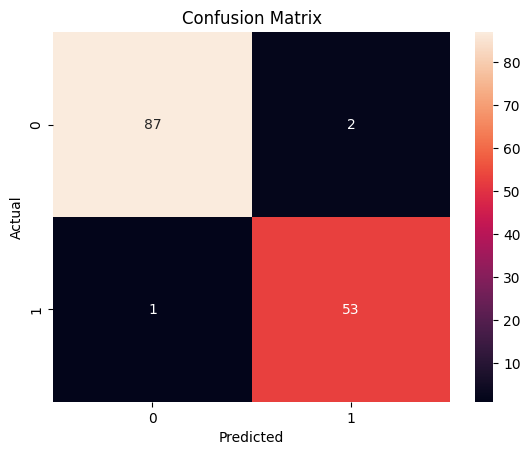

In [71]:
#Graph de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [72]:
#Score de précision du modèle
accuracy_score(y_test, y_pred)

0.9790209790209791